Wn for 10s: [0.01, 0.025, 0.04, 0.055, 0.0725, 0.07, 0.0975, 0.1175, 0.12, 0.105, 0.0675, 0.07, 0.0675, 0.03, 0.025, 0.0125, 0.0075, 0.0025, 0.0025, 0.0025]


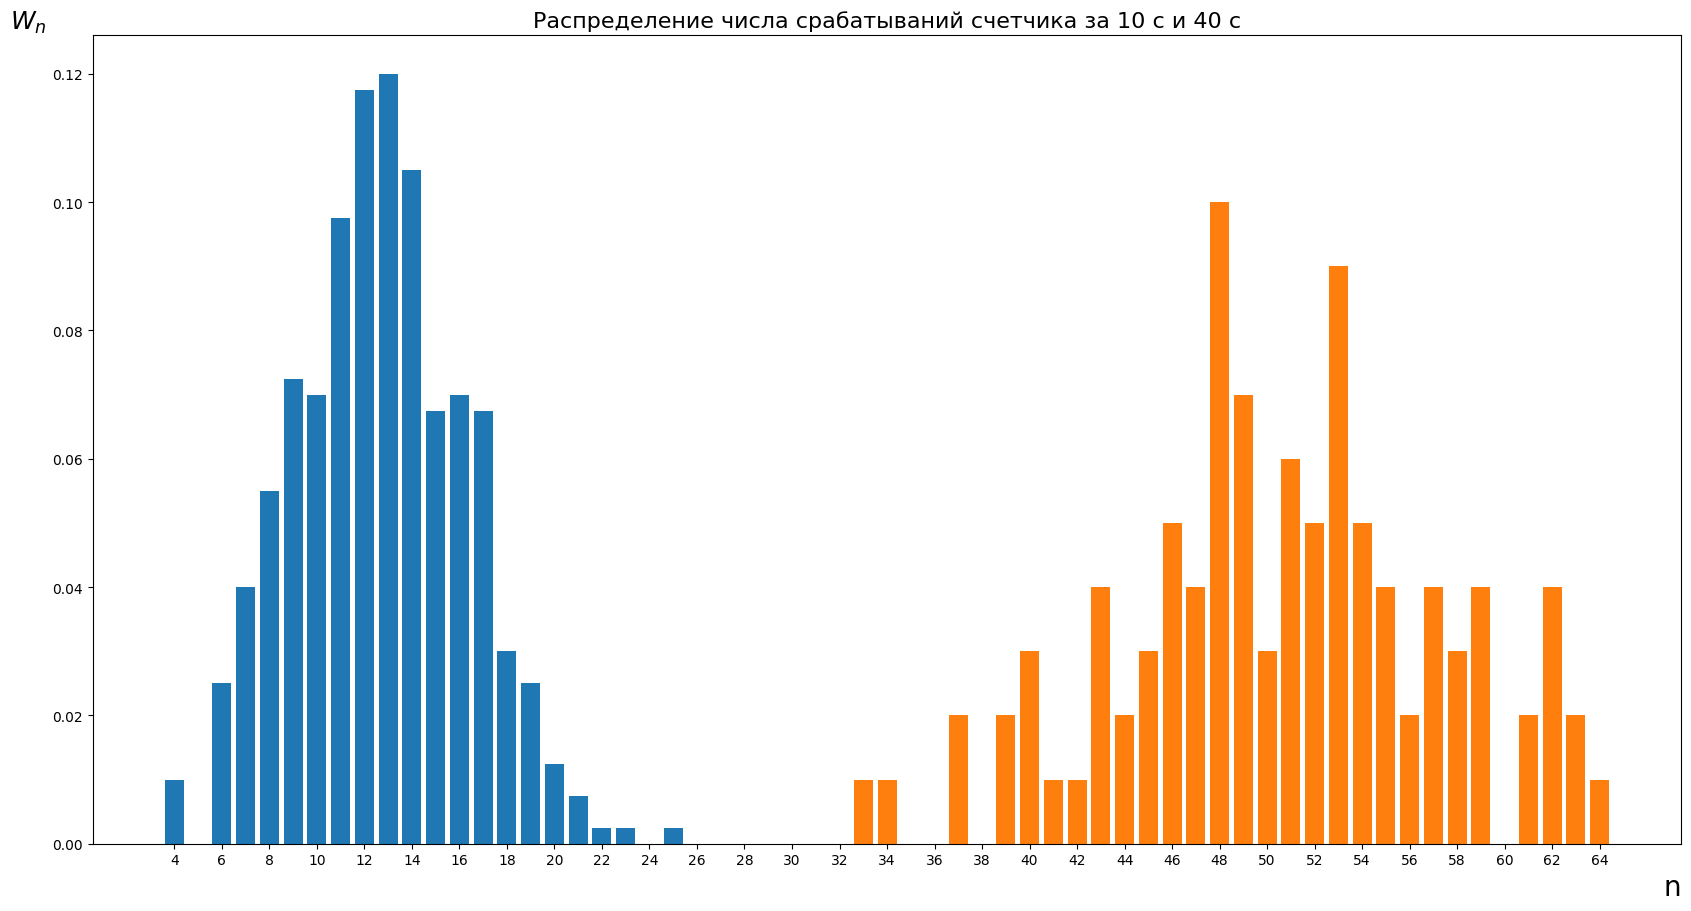

In [34]:
from cProfile import label
from cmath import sqrt
import matplotlib.pyplot as plt
import numpy as np

from collections import Counter
%matplotlib inline


## для 10-ти секунд

Imp_Count_10 = [4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25]
Imp_Repeats_10 = [4, 10, 16, 22, 29, 28, 39, 47, 48, 42, 27, 28, 27, 12, 10, 5, 3, 1, 1, 1]


Exp_Count_10 = sum(Imp_Repeats_10) # 400

Wn_10 = list(map(lambda x: x / Exp_Count_10, Imp_Repeats_10))
print("Wn for 10s:", Wn_10)


Ns_Count_20 = [ 27, 23, 26, 23, 21, 22, 13, 35, 31, 24,
                28, 19, 30, 19, 19, 32, 29, 25, 30, 22,
                27, 29, 32, 30, 30, 23, 21, 32, 25, 24,
                31, 21, 28, 26, 24, 35, 31, 28, 35, 27,

                22, 28, 28, 29, 24, 24, 32, 25, 27, 30,
                27, 17, 21, 22, 17, 25, 32, 26, 33, 20,
                15, 22, 21, 24, 31, 26, 10, 24, 23, 17,
                16, 25, 27, 27, 22, 27, 35, 26, 28, 16,
                
                29, 25, 25, 23, 26, 23, 27, 21, 20, 23,
                23, 26, 21, 24, 35, 19, 18, 30, 25, 34,
                32, 31, 23, 24, 22, 24, 29, 30, 38, 24,
                16, 30, 27, 13, 22, 29, 28, 25, 24, 27,
                
                16, 24, 22, 28, 22, 26, 16, 29, 23, 25,
                23, 25, 17, 31, 26, 25, 27, 25, 26, 30,
                26, 27, 22, 25, 26, 20, 28, 23, 30, 22,
                28, 27, 27, 31, 33, 25, 27, 20, 31, 30,
                
                24, 22, 31, 24, 23, 16, 20, 13, 26, 22,
                23, 30, 29, 26, 20, 17, 25, 28, 26, 13,
                31, 31, 25, 26, 30, 23, 18, 25, 30, 34,
                31, 21, 19, 30, 22, 24, 26, 27, 33, 30 ]


Ns_count_40 = []

for i in range(0, len(Ns_Count_20), 2):
    Ns_count_40.append(Ns_Count_20[i] + Ns_Count_20[i + 1])

Count_Repeats_40 = dict(Counter(Ns_count_40))

Imp_Count_40 = list(Count_Repeats_40.keys())
Imp_Repeats_40 = list(Count_Repeats_40.values())

Exp_Count_40 = sum(Count_Repeats_40.values()) # 100

Wn_40 = list(map(lambda x: x / Exp_Count_40, Imp_Repeats_40))
#print(sorted(list(Count_Repeats_40.items())))

nd = dict(map(lambda kv: (kv[0], kv[1]/Exp_Count_40), Count_Repeats_40.items()))
#print(sorted(list(nd.items())))
#print("Wn for 40s:", Wn_40)


plt.title(r"Распределение числа срабатываний счетчика за 10 с и 40 с", fontsize=16)
plt.ylabel("$W_n$", fontsize=18, loc="top", rotation="horizontal")
plt.xlabel(r"n", fontsize=20, loc="right")

plt.bar(x=Imp_Count_10, height=Wn_10, align='center', label='10s')
plt.bar(x=Imp_Count_40, height=Wn_40, align='center', label='40s')
plt.xticks(range(min(Imp_Count_10), max(Imp_Count_40) + 1, 2))
plt.gcf().set_size_inches(20.5, 10.5)
plt.gcf().set_dpi(100)
# plt.legend()
# plt.savefig('dist_10_40.png')


aver_10 = sum(Ns_Count_20) / 400

S = sum(Ns_Count_20)

Ns_Count_10 = []
sq_sum_10 = 0
for i in range(len(Imp_Repeats_10)):
    Ns_Count_10.extend(Imp_Repeats_10[i] * [Imp_Count_10[i]])
    sq_sum_10 += Imp_Repeats_10[i] * (Imp_Count_10[i] - aver_10)**2


sigma_separate_10 = np.sqrt(sq_sum_10 / 400)

sigma_separate_10_var2 = np.sqrt(aver_10)


fits_sigma_1 = 0
fits_sigma_2 = 0
for i in range(len(Ns_Count_10)):
    if (abs(Ns_Count_10[i] - aver_10) <= sigma_separate_10) :
        fits_sigma_1 += 1
    if (abs(Ns_Count_10[i] - aver_10) <= sigma_separate_10 * 2) :
        fits_sigma_2 += 1


aver_40 = S / 100

sq_sum_40 = 0
for i in range(len(Ns_count_40)):
    sq_sum_40 += (Ns_count_40[i] - aver_40)**2

sigma_separate_40 = np.sqrt(sq_sum_40 / 100)

sigma_separate_40_var2 = np.sqrt(aver_40)
